In [44]:
import pandas as pd

surveyresults_df = pd.read_csv('CSCI_1070_survey_results.csv')
df = surveyresults_df


column_mapping = {
    "Timestamp": "Timestamp",
    "What is your name?": "Name",
    "What state/country were you born in?": "Birthplace",
    "Are you working while in school?": "Working?",
    "How much experience do you have programming?": "ProgrammingExperience",
    "What class are you in?": "Class",
    "How many siblings do you have?": "Siblings",
    "How many pets and of which kind do you have?": "Pets",
    "What is your favorite type of food?": "FavoriteFood",
    "Where do you live?": "LivingPlace",
    "Do you take the metro?": "Metro",
    "What is your major?": "Major",
    "How old are you?": "Age",
    "What is your favorite TV show?": "FavoriteShow",
    "What is your favorite video game?": "FavoriteGame",
    "What is your favorite book?": "FavoriteBook",
    "Why are you taking this class?": "ReasonForTakingClass",
    "What's your favorite bash command?": "FavoriteBashCommand"
}


def cleaning_data(df):
    
    df = df.rename(columns=column_mapping)

   
    df['Birthplace'] = df['Birthplace'].str.strip().str.title().replace({
        'United States, Missouri': 'Missouri',
        'Missouri/U.S': 'Missouri',
        'Saudi Arabia': 'Saudi',
        'Benghazi, Libya': 'Libya',
        'Georgia, USA': 'Georgia'
    })

    
    df['Pets'] = df['Pets'].str.strip()
    df['Pets'] = df['Pets'].replace({
        'no pets': 'None',
        'My French bulldog just passed away a few months ago': 'None',
        'I have two dogs both chihuahua mixes.': 'Two dogs',
        'I have two golden retrievers, Ellie and Amber. Ellie is ten years young and everything good about life. Amber is two and scared of everything (foster), but Ellie''s teaching her that thing seven plastic bags are okay.': 'Two dogs',
        '2 cats and 1 dog': 'Two cats and one dog',
        'We have a Husky named Maverick': 'One dog',
        '1 maincoon': 'One cat',
        '2 miniature daschund dogs': 'Two dogs'
    })

  
    df['FavoriteFood'] = df['FavoriteFood'].str.strip().str.lower().replace({
        'pasta but fish is a close second.': 'Pasta',
        'mexican.': 'Mexican',
        'injera': 'Injera',
        'pastaaaaa': 'Pasta',
        'some sort of steak, probably a filet mignon': 'Steak',
        'burgers (blue cheese)': 'Burgers',
        'grilled chicken': 'Grilled Chicken',
        'salmon': 'Salmon',
        'i dont have a favorite': 'None',
        'mexican/middleeastern': 'Mexican',
        'pizza or steak': 'Pizza'
    })


    df['Major'] = df['Major'].str.strip().replace({
        'data science': 'DS', 
        'computer science': 'CS',
        'comp sci': 'CS',
        'It was pre medicine therefore biology but I decided to switch over to computer science because I did not want to endure the tedious amounts of schooling to be a physician and I find software programming to be cool and the future.' : 'CS',
        'Criminology and Criminal Justice and I am planing to have a minor in CS': 'Criminology_CriminalJustice',
        'forensic science': 'FS',
        'International Business (Graduated)': 'Grad'
    })

    df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
    df['Age'] = df['Age'].replace({
        "19 turning 20 on february 28": 19,
        "18 years old": 18
    })

    df['Age'] = df['Age'].apply(lambda x: x if 0 <= x <= 150 else None)

    return df



cleaning_data(df)


,Timestamp,Name,Birthplace,Working?,ProgrammingExperience,What class are you in?,Siblings,Pets,FavoriteFood,LivingPlace,Metro,Major,Age,FavoriteShow,FavoriteGame,FavoriteBook,Why are you taking this class?,Whats your favorite bash command?
0,2024/01/29 6:34:23 PM CST,Gavin Edwards,Missouri,Yes,6 months - 1 year,Freshman,1,Two dogs,Pasta,On campus,No,Data Science,18.0,Breaking Bad,Rocket League,The Scythe series,Its a requirement for the data science major.,ls
1,2024/01/29 6:46:07 PM CST,NaN,"Saint Louis, Missouri",Yes,0-3 months,Freshman,2,0,hot wings,Off campus,No,Nursing,19.0,Criminal Minds,Valorant,A Little life by Hanya Yanaghara,I have an interest in programming. I enjoy lea...,NaN
2,2024/01/29 7:45:39 PM CST,Connor Love,Illinois,No,0-3 months,Freshman,1,"I have two golden retrievers, Ellie and Amber....",Mexican,On campus,No,Economics and Finance.,19.0,The Wire.,Pokémon White 2.,"""Surprised by Joy"" by C. S. Lewis.",Transfer course requirements for the Universit...,"<git push> by far, too satisfying."
3,2024/01/29 7:47:12 PM CST,Liam,Missouri,Yes,0-3 months,Freshman,1,0,vietnamese,Off campus,No,Biochemistry,18.0,NaN,NaN,NaN,Applicability,NaN
4,2024/01/29 10:45:38 PM CST,Aarushi Choudhary,Japan,Yes,0-3 months,Freshman,1,No pets,pasta,On campus,Yes,Health Sciences,18.0,NaN,Spiderman 2,NaN,I'm trying to get a minor in data science,ls
5,2024/01/29 10:55:40 PM CST,Noel Zerai,Missouri,Yes,0-3 months,Freshman,2,none,Injera,On campus,No,CS,19.0,on my block,assassins creed origins,kite runner,just as an intro to my desired career.,ls
6,2024/01/29 11:50:50 PM CST,Kine Thiam,United States,Yes,0-3 months,Freshman,5+,0,Pasta,On campus,Yes,CS,18.0,Reign,It takes two,Wonder,At first it was to see if I’d like computer sc...,NaN
7,2024/01/30 5:24:37 PM CST,Bandar Aldhahri,Saudi,Yes,0-3 months,Junior,5+,0,kabsa,Off campus,No,Criminology_CriminalJustice,NaN,Breaking Bad,FIFA - Soccer,NaN,I am planing to get a master degree in CyberSe...,until now is pwd
8,2024/01/31 10:44:53 AM CST,Aida Bah,Minnesota,Yes,0-3 months,Freshman,2,0,gambian food,On campus,Yes,Computer Science,18.0,NaN,NaN,Dead End Memories - Banana Yoshimoto,"For my major, to learn python",tree
9,2024/01/31 6:34:07 PM CST,Kevin Patel,India,No,0-3 months,Senior,0,NaN,italian,Off campus,No,Finance,21.0,Peaky Blinders,Warzone,The Great Gatsby,To learn the basics of python to help me stand...,'cd'


In [53]:
pip install matplotlib


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.0.10/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


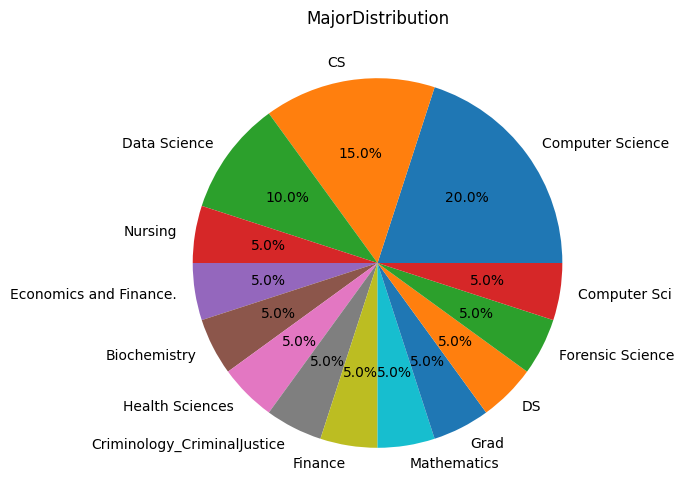

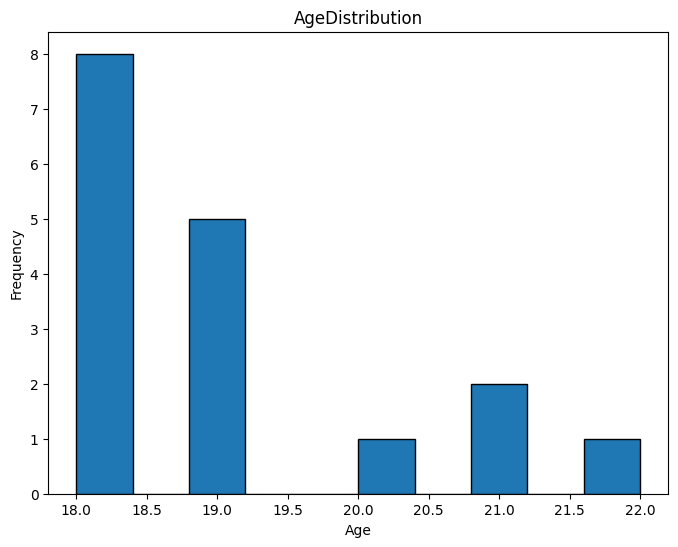

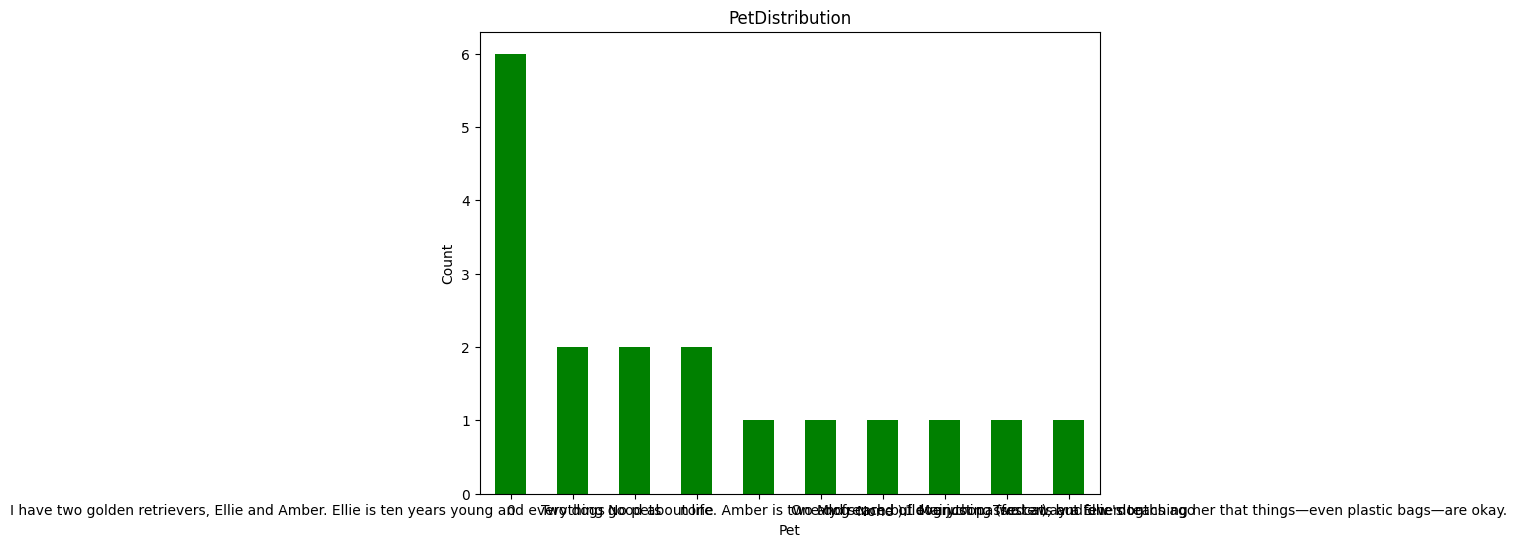

In [45]:
import matplotlib.pyplot as plt 
df = cleaning_data(df) 

def survey_visual(df):
    
    major_counts = df['Major'].value_counts()
    plt.figure(figsize = (10,6)) 
    major_counts.plot(kind = 'pie', autopct = '%1.1f%%')
    plt.title("MajorDistribution") 
    plt.ylabel('')
    plt.show() 
    
    plt.figure(figsize = (8,6))
    plt.hist(df['Age'].dropna(),bins=10, edgecolor = 'black')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.title('AgeDistribution')
    plt.show()
    
    pet_counts= df['Pets'].value_counts()
    plt.figure(figsize = (8,6))
    pet_counts.plot(kind = 'bar', color = 'green')
    plt.xlabel('Pet')
    plt.ylabel('Count') 
    plt.title('PetDistribution') 
    plt.xticks(rotation = 0) 
    plt.show() 

survey_visual(df)

In [23]:
cleaning_data(df)

,Timestamp,Name,Birthplace,Working?,ProgrammingExperience,What class are you in?,Siblings,Pets,FavoriteFood,LivingPlace,Metro,Major,Age,FavoriteShow,FavoriteGame,FavoriteBook,Why are you taking this class?,FavoriteBashCommand
0,2024/01/29 6:34:23 PM CST,Gavin Edwards,Missouri,Yes,6 months - 1 year,Freshman,1,Two dogs,Pasta,On campus,No,DS,18,Breaking Bad,Rocket League,The Scythe series,Its a requirement for the data science major.,ls
1,2024/01/29 6:46:07 PM CST,NaN,"Saint Louis, Missouri",Yes,0-3 months,Freshman,2,0,hot wings,Off campus,No,Nursing,19,Criminal Minds,Valorant,A Little life by Hanya Yanaghara,I have an interest in programming. I enjoy lea...,NaN
2,2024/01/29 7:45:39 PM CST,Connor Love,Illinois,No,0-3 months,Freshman,1,"i have two golden retrievers, ellie and amber....",Mexican,On campus,No,Economics And Finance.,19,The Wire.,Pokémon White 2.,"""Surprised by Joy"" by C. S. Lewis.",Transfer course requirements for the Universit...,"<git push> by far, too satisfying."
3,2024/01/29 7:47:12 PM CST,Liam,Missouri,Yes,0-3 months,Freshman,1,0,vietnamese,Off campus,No,Biochemistry,18,NaN,NaN,NaN,Applicability,NaN
4,2024/01/29 10:45:38 PM CST,Aarushi Choudhary,Japan,Yes,0-3 months,Freshman,1,None,pasta,On campus,Yes,Health Sciences,18,NaN,Spiderman 2,NaN,I'm trying to get a minor in data science,ls
5,2024/01/29 10:55:40 PM CST,Noel Zerai,Missouri,Yes,0-3 months,Freshman,2,None,Injera,On campus,No,Comp Sci,19,on my block,assassins creed origins,kite runner,just as an intro to my desired career.,ls
6,2024/01/29 11:50:50 PM CST,Kine Thiam,United States,Yes,0-3 months,Freshman,5+,0,Pasta,On campus,Yes,It Was Pre Medicine Therefore Biology But I De...,18,Reign,It takes two,Wonder,At first it was to see if I’d like computer sc...,NaN
7,2024/01/30 5:24:37 PM CST,Bandar Aldhahri,Saudi,Yes,0-3 months,Junior,5+,0,kabsa,Off campus,No,Criminology And Criminal Justice And I Am Plan...,NaN,Breaking Bad,FIFA - Soccer,NaN,I am planing to get a master degree in CyberSe...,until now is pwd
8,2024/01/31 10:44:53 AM CST,Aida Bah,Minnesota,Yes,0-3 months,Freshman,2,0,gambian food,On campus,Yes,CS,18,NaN,NaN,Dead End Memories - Banana Yoshimoto,"For my major, to learn python",tree
9,2024/01/31 6:34:07 PM CST,Kevin Patel,India,No,0-3 months,Senior,0,NaN,italian,Off campus,No,Finance,21,Peaky Blinders,Warzone,The Great Gatsby,To learn the basics of python to help me stand...,'cd'
